In [82]:
import pandas as pd 
import numpy as np 
import tensorflow as tf

In [83]:
pd.options.display.max_rows = None

In [84]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


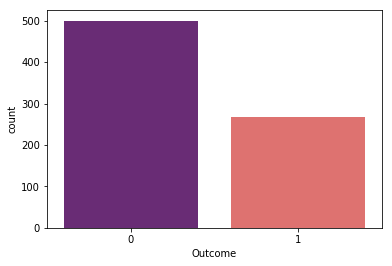

In [85]:
sns.countplot(x = 'Outcome', data = df, palette = 'magma')

In [86]:
print("Shape of Dataset :",df.shape)
print("\nNumber of NON NULL values :\n")
df.info()

Shape of Dataset : (768, 9)

Number of NON NULL values :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [87]:
print("**** Minimum value in each column **** \n")
for col in df.columns:
    print(col ,":",min(df[col]))
    

**** Minimum value in each column **** 

Pregnancies : 0
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0.0
DiabetesPedigreeFunction : 0.078
Age : 21
Outcome : 0


In [88]:
# Glucose : 0 BloodPressure : 0 SkinThickness : 0 Insulin : 0 BMI : 0.0 These columns can't be 0
# It means these have NULL values before .We are going to replace 0 with NULL and then NULL with 
# column's MEAN.

extracted_cols = df.drop(columns=['Pregnancies' , 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
extracted_cols.replace(0,np.NaN , inplace=True)
extracted_cols.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [89]:
# Replacing these extracted columns with original dataframe's columns

df['Glucose'] = extracted_cols['Glucose']
df['BloodPressure'] = extracted_cols['BloodPressure']
df['SkinThickness'] = extracted_cols['SkinThickness']
df['Insulin'] = extracted_cols['Insulin']
df['BMI'] = extracted_cols['BMI']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [90]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [91]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [92]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [93]:
np_df = df.values

In [94]:
train_data = np_df[:568 , :8]
test_data = np_df[568: , :8]
train_labels = np_df[:568 , 8]
test_labels = np_df[568: , 8]

In [98]:
mean = train_data.mean(axis = 0)
train_data -= mean
sd = train_data.std(axis = 0)
train_data /= sd

test_data -= mean
test_data /= sd

In [99]:
print(train_data.shape,test_data.shape,train_labels.shape,test_labels.shape)

(568, 8) (200, 8) (568,) (200,)


In [100]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(8,)) , 
        tf.keras.layers.Dense(32, activation = 'relu') , 
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation = 'relu') ,
        tf.keras.layers.Dense(1,activation = 'sigmoid')
        ])

In [101]:
model.compile(optimizer = 'adam' , 
              loss = 'binary_crossentropy' , 
              metrics=['accuracy']
             )

In [102]:
model.fit(train_data , train_labels , epochs = 200 ,  verbose = 2 )

Train on 568 samples
Epoch 1/200
568/568 - 1s - loss: 0.6499 - accuracy: 0.6637
Epoch 2/200
568/568 - 0s - loss: 0.6076 - accuracy: 0.6813
Epoch 3/200
568/568 - 0s - loss: 0.5725 - accuracy: 0.7042
Epoch 4/200
568/568 - 0s - loss: 0.5457 - accuracy: 0.7254
Epoch 5/200
568/568 - 0s - loss: 0.5258 - accuracy: 0.7342
Epoch 6/200
568/568 - 0s - loss: 0.5072 - accuracy: 0.7465
Epoch 7/200
568/568 - 0s - loss: 0.4943 - accuracy: 0.7482
Epoch 8/200
568/568 - 0s - loss: 0.4901 - accuracy: 0.7500
Epoch 9/200
568/568 - 0s - loss: 0.4790 - accuracy: 0.7606
Epoch 10/200
568/568 - 0s - loss: 0.4701 - accuracy: 0.7746
Epoch 11/200
568/568 - 0s - loss: 0.4723 - accuracy: 0.7676
Epoch 12/200
568/568 - 0s - loss: 0.4642 - accuracy: 0.7694
Epoch 13/200
568/568 - 0s - loss: 0.4671 - accuracy: 0.7676
Epoch 14/200
568/568 - 0s - loss: 0.4587 - accuracy: 0.7817
Epoch 15/200
568/568 - 0s - loss: 0.4610 - accuracy: 0.7711
Epoch 16/200
568/568 - 0s - loss: 0.4554 - accuracy: 0.7852
Epoch 17/200
568/568 - 0s - 

Epoch 137/200
568/568 - 0s - loss: 0.3509 - accuracy: 0.8398
Epoch 138/200
568/568 - 0s - loss: 0.3522 - accuracy: 0.8398
Epoch 139/200
568/568 - 0s - loss: 0.3355 - accuracy: 0.8451
Epoch 140/200
568/568 - 0s - loss: 0.3513 - accuracy: 0.8310
Epoch 141/200
568/568 - 0s - loss: 0.3636 - accuracy: 0.8363
Epoch 142/200
568/568 - 0s - loss: 0.3570 - accuracy: 0.8275
Epoch 143/200
568/568 - 0s - loss: 0.3381 - accuracy: 0.8468
Epoch 144/200
568/568 - 0s - loss: 0.3519 - accuracy: 0.8345
Epoch 145/200
568/568 - 0s - loss: 0.3481 - accuracy: 0.8398
Epoch 146/200
568/568 - 0s - loss: 0.3561 - accuracy: 0.8151
Epoch 147/200
568/568 - 0s - loss: 0.3564 - accuracy: 0.8345
Epoch 148/200
568/568 - 0s - loss: 0.3515 - accuracy: 0.8363
Epoch 149/200
568/568 - 0s - loss: 0.3377 - accuracy: 0.8327
Epoch 150/200
568/568 - 0s - loss: 0.3472 - accuracy: 0.8380
Epoch 151/200
568/568 - 0s - loss: 0.3505 - accuracy: 0.8169
Epoch 152/200
568/568 - 0s - loss: 0.3548 - accuracy: 0.8257
Epoch 153/200
568/568 - 

In [103]:
loss , test_acc  = model.evaluate(test_data , test_labels , verbose = 0)
print("Test Accuracy :"+str(round(test_acc * 100))+"%")

Test Accuracy :79.0%


Text(33.0, 0.5, 'Actual')

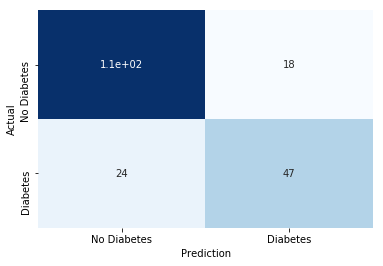

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict_classes(test_data)
c_matrix = confusion_matrix(test_labels, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,xticklabels=['No Diabetes','Diabetes'],
                 yticklabels=['No Diabetes','Diabetes'],cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [105]:
c_matrix

array([[111,  18],
       [ 24,  47]], dtype=int64)

In [111]:
prediction = model.predict(test_data[5].reshape(1,8))
prediction

array([[0.01486232]], dtype=float32)

In [112]:
test_labels[5]

0.0

In [117]:
prediction = model.predict(test_data[190].reshape(1,8))
prediction

array([[0.1696128]], dtype=float32)

In [118]:
test_labels[190]

0.0

In [122]:
prediction = model.predict(test_data[193].reshape(1,8))
prediction

array([[0.850619]], dtype=float32)

In [123]:
test_labels[193]

1.0

In [126]:
#Incorrect prediction

prediction = model.predict(test_data[67].reshape(1,8))
prediction

array([[0.8243296]], dtype=float32)

In [127]:
test_labels[68]

0.0